<a href="https://colab.research.google.com/github/revs1/Simple_ML_notebooks-revs96/blob/master/GAN_for_Mnist_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.14.0
import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.2


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Use keras.la

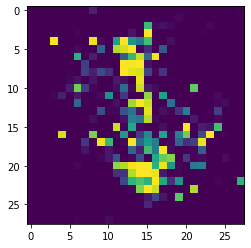

In [2]:
# importing the necessary libraries and the MNIST dataset 
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.examples.tutorials.mnist import input_data 

mnist = input_data.read_data_sets("MNIST_data") 

# defining functions for the two networks. 
# Both the networks have two hidden layers 
# and an output layer which are densely or 
# fully connected layers defining the 
# Generator network function 
def generator(z, reuse = None): 
	with tf.variable_scope('gen', reuse = reuse): 
		hidden1 = tf.layers.dense(inputs = z, units = 128, 
							activation = tf.nn.leaky_relu) 
							
		hidden2 = tf.layers.dense(inputs = hidden1, 
		units = 128, activation = tf.nn.leaky_relu) 
			
		output = tf.layers.dense(inputs = hidden2, 
			units = 784, activation = tf.nn.tanh) 
		
		return output 

# defining the Discriminator network function 
def discriminator(X, reuse = None): 
	with tf.variable_scope('dis', reuse = reuse): 
		hidden1 = tf.layers.dense(inputs = X, units = 128, 
							activation = tf.nn.leaky_relu) 
							
		hidden2 = tf.layers.dense(inputs = hidden1, 
			units = 128, activation = tf.nn.leaky_relu) 
				
		logits = tf.layers.dense(hidden2, units = 1) 
		output = tf.sigmoid(logits) 
		
		return output, logits 

# creating placeholders for the outputs 
tf.reset_default_graph() 

real_images = tf.placeholder(tf.float32, shape =[None, 784]) 
z = tf.placeholder(tf.float32, shape =[None, 100]) 

G = generator(z) 
D_output_real, D_logits_real = discriminator(real_images) 
D_output_fake, D_logits_fake = discriminator(G, reuse = True) 

# defining the loss function 
def loss_func(logits_in, labels_in): 
	return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits( 
						logits = logits_in, labels = labels_in)) 

# Smoothing for generalization 
D_real_loss = loss_func(D_logits_real, tf.ones_like(D_logits_real)*0.9) 
D_fake_loss = loss_func(D_logits_fake, tf.zeros_like(D_logits_real)) 
D_loss = D_real_loss + D_fake_loss 

G_loss = loss_func(D_logits_fake, tf.ones_like(D_logits_fake)) 

# defining the learning rate, batch size, 
# number of epochs and using the Adam optimizer 
lr = 0.001 # learning rate 

# Do this when multiple networks 
# interact with each other 

# returns all variables created(the two 
# variable scopes) and makes trainable true 
tvars = tf.trainable_variables() 
d_vars =[var for var in tvars if 'dis' in var.name] 
g_vars =[var for var in tvars if 'gen' in var.name] 

D_trainer = tf.train.AdamOptimizer(lr).minimize(D_loss, var_list = d_vars) 
G_trainer = tf.train.AdamOptimizer(lr).minimize(G_loss, var_list = g_vars) 

batch_size = 100 # batch size 
epochs = 500 # number of epochs. The higher the better the result 
init = tf.global_variables_initializer() 

# creating a session to train the networks 
samples =[] # generator examples 

with tf.Session() as sess: 
	sess.run(init) 
	for epoch in range(epochs): 
		num_batches = mnist.train.num_examples//batch_size 
		
		for i in range(num_batches): 
			batch = mnist.train.next_batch(batch_size) 
			batch_images = batch[0].reshape((batch_size, 784)) 
			batch_images = batch_images * 2-1
			batch_z = np.random.uniform(-1, 1, size =(batch_size, 100)) 
			_= sess.run(D_trainer, feed_dict ={real_images:batch_images, z:batch_z}) 
			_= sess.run(G_trainer, feed_dict ={z:batch_z}) 
			
		print("on epoch{}".format(epoch)) 
		
		sample_z = np.random.uniform(-1, 1, size =(1, 100)) 
		gen_sample = sess.run(generator(z, reuse = True), 
								feed_dict ={z:sample_z}) 
		
		samples.append(gen_sample) 

# result after 0th epoch 
plt.imshow(samples[0].reshape(28, 28)) 

# result after 499th epoch 
plt.imshow(samples[49].reshape(28, 28)) 
